### Importing all libraries

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Create Dataframe**

In [224]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [225]:
## Features
for column in df.columns :
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [226]:
# Data types of each features
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [227]:
# Missing values in the given dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Understanding dataset in more wider view
df.head(20)

There are many 0's in the dataset for features blood pressure, BMI, Insulin, skinthickness. This is not possible.

In [230]:
#Size of the dataset
df.shape

(768, 9)

- **Target column** :- Outcome [0,1] -> Binary Classification Task
- As the target column (outcome) is availabe in the dataset, supervised machine learning algorithm (Logistic Regression).
- Records : 768

### EDA

#### EDA : Feature Selection and Data Imputation

**Correleation Coeffecient**

In [235]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


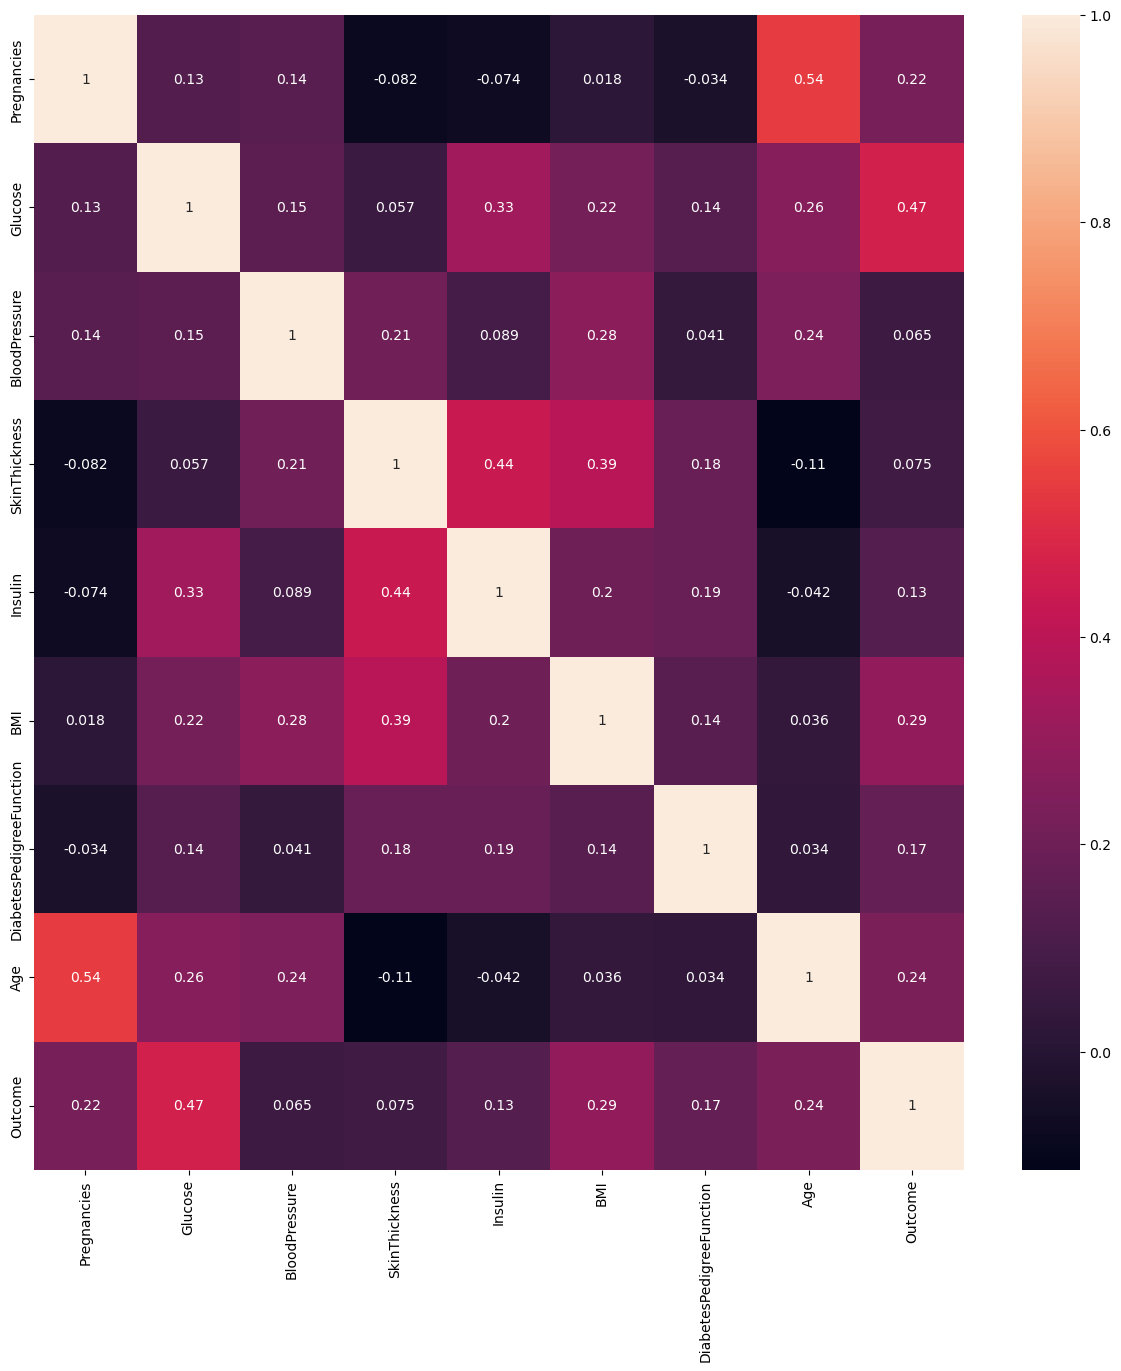

In [236]:
## Heat Map
plt.figure(figsize = (15,15))
ax = sns.heatmap(df.corr(), annot = True)
plt.savefig("Correlation_Coeff.jpg")
plt.show()

As there are no features which are strongly correleated. Hence, no feture will be removed.

**Descriptive Statistics of the given data**

In [239]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Data Imputation

- There are no missing values in the data set.
- But there are some 0's which are not possible :- Glucose, BloodPressure, SkinThickness, Insulin, BMI. Impute data for these 0's.

**Steps for data Imputation**
- Type of data distribution.
- If its symmetric then replace 0 by mean otherwise by median.

**Glucose**

C:\Users\pkra6\AppData\Local\Temp\ipykernel_8832\202538181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose)


<Axes: xlabel='Glucose', ylabel='Density'>

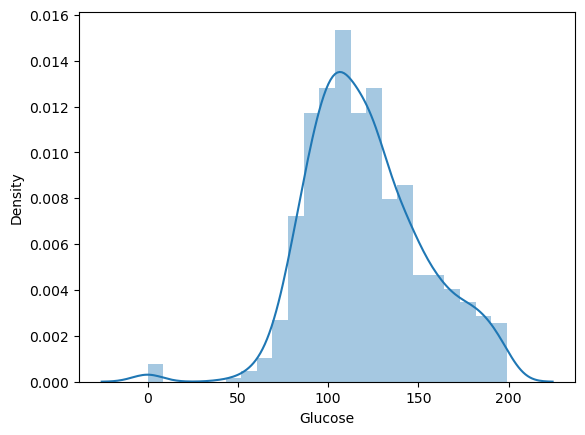

In [244]:
## Glucose
sns.distplot(df.Glucose)

Glucose distribution is almost symmetric. Hence, mean is used as imputation.

In [246]:
## Replacing 0 with mean
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())

In [247]:
df["Glucose"].describe()

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

**Blood Pressure**

C:\Users\pkra6\AppData\Local\Temp\ipykernel_8832\159059178.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

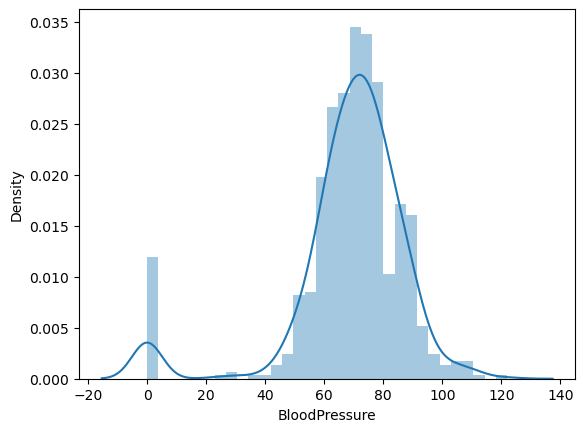

In [249]:
## Blood Pressure Distribution
sns.distplot(df.BloodPressure)

Blood Pressure's Distribution is symmetric. Hence mean is used to replace. 

C:\Users\pkra6\AppData\Local\Temp\ipykernel_8832\2292339408.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

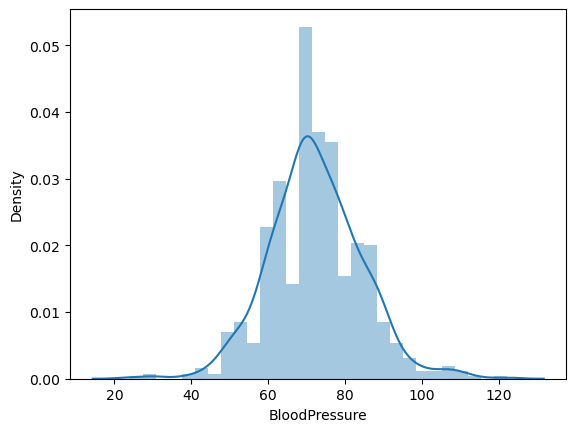

In [251]:
## Replacing 0's with mean
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())

## Distribution after replacing zeros'
sns.distplot(df.BloodPressure)

**Skin Thickness**

C:\Users\pkra6\AppData\Local\Temp\ipykernel_8832\54694808.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SkinThickness)


<Axes: xlabel='SkinThickness', ylabel='Density'>

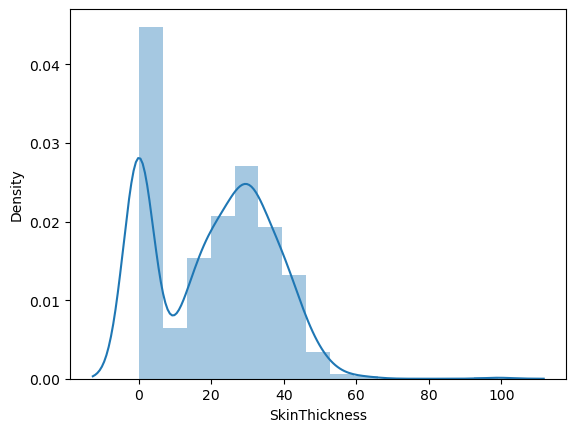

In [253]:
## SkinThickness distribution
sns.distplot(df.SkinThickness)

Skin Thickness's Distribution is symmetric skewness. Hence, mean is used to replace the zeros.

C:\Users\pkra6\AppData\Local\Temp\ipykernel_8832\2752032666.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SkinThickness)


<Axes: xlabel='SkinThickness', ylabel='Density'>

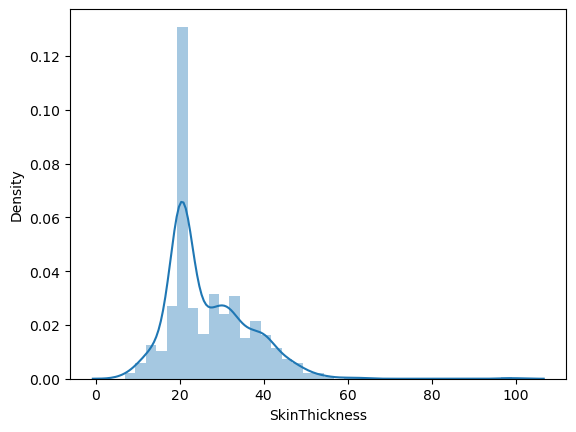

In [255]:
## Rreplacing zeros with mean
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

## Distribution plot after data imputation
sns.distplot(df.SkinThickness)

**Insulin**

C:\Users\pkra6\AppData\Local\Temp\ipykernel_8832\3491628286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

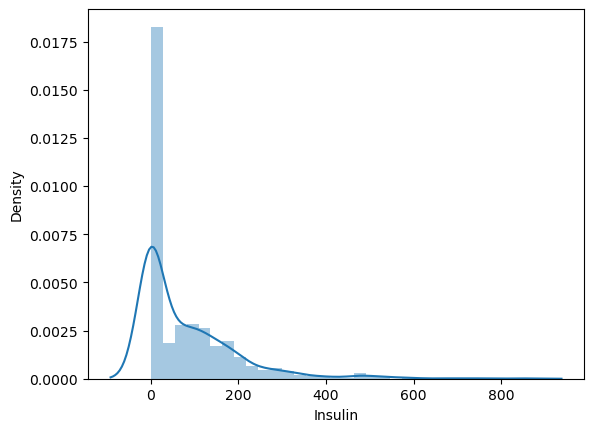

In [257]:
## Distribution of Insulin
sns.distplot(df.Insulin)

Insulin distribution is left skewed. Hence, meadian is used.

C:\Users\pkra6\AppData\Local\Temp\ipykernel_8832\2865446572.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

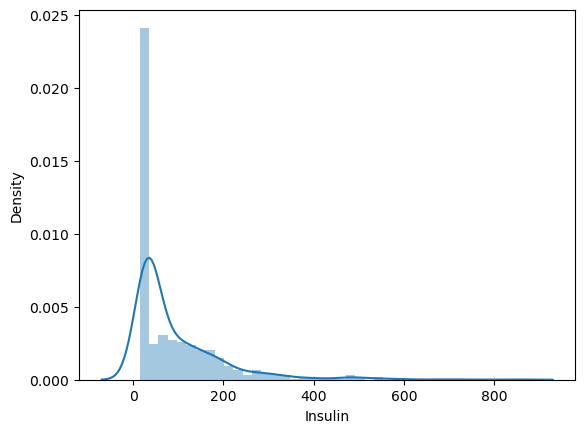

In [259]:
## Replacing zeros
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].median())

## Distribution after after data imputation
sns.distplot(df.Insulin)

**BMI**

C:\Users\pkra6\AppData\Local\Temp\ipykernel_8832\2231070576.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

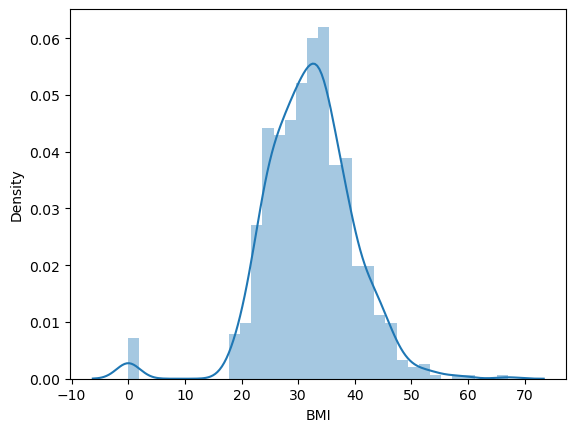

In [261]:
## Distribution of BMI
sns.distplot(df.BMI)

BMI is normally distributted. Hence, mean is used as data imputation 

C:\Users\pkra6\AppData\Local\Temp\ipykernel_8832\3477446767.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

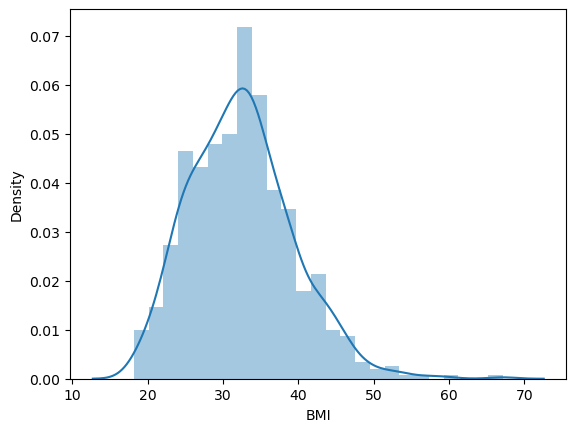

In [263]:
# Replacing zeros
df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())

## Distribution aftere data imputation
sns.distplot(df.BMI)

In [264]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### EDA : Outlier Detection and Normalization

- X -> input feature
- Y -> target value (Outcome)

In [267]:
# For X drop the outcome from the data frame
X = df.drop(columns = "Outcome", axis = 1)

# For Y, only the outcome will be considered
Y = df["Outcome"]

##### Outlier Detection

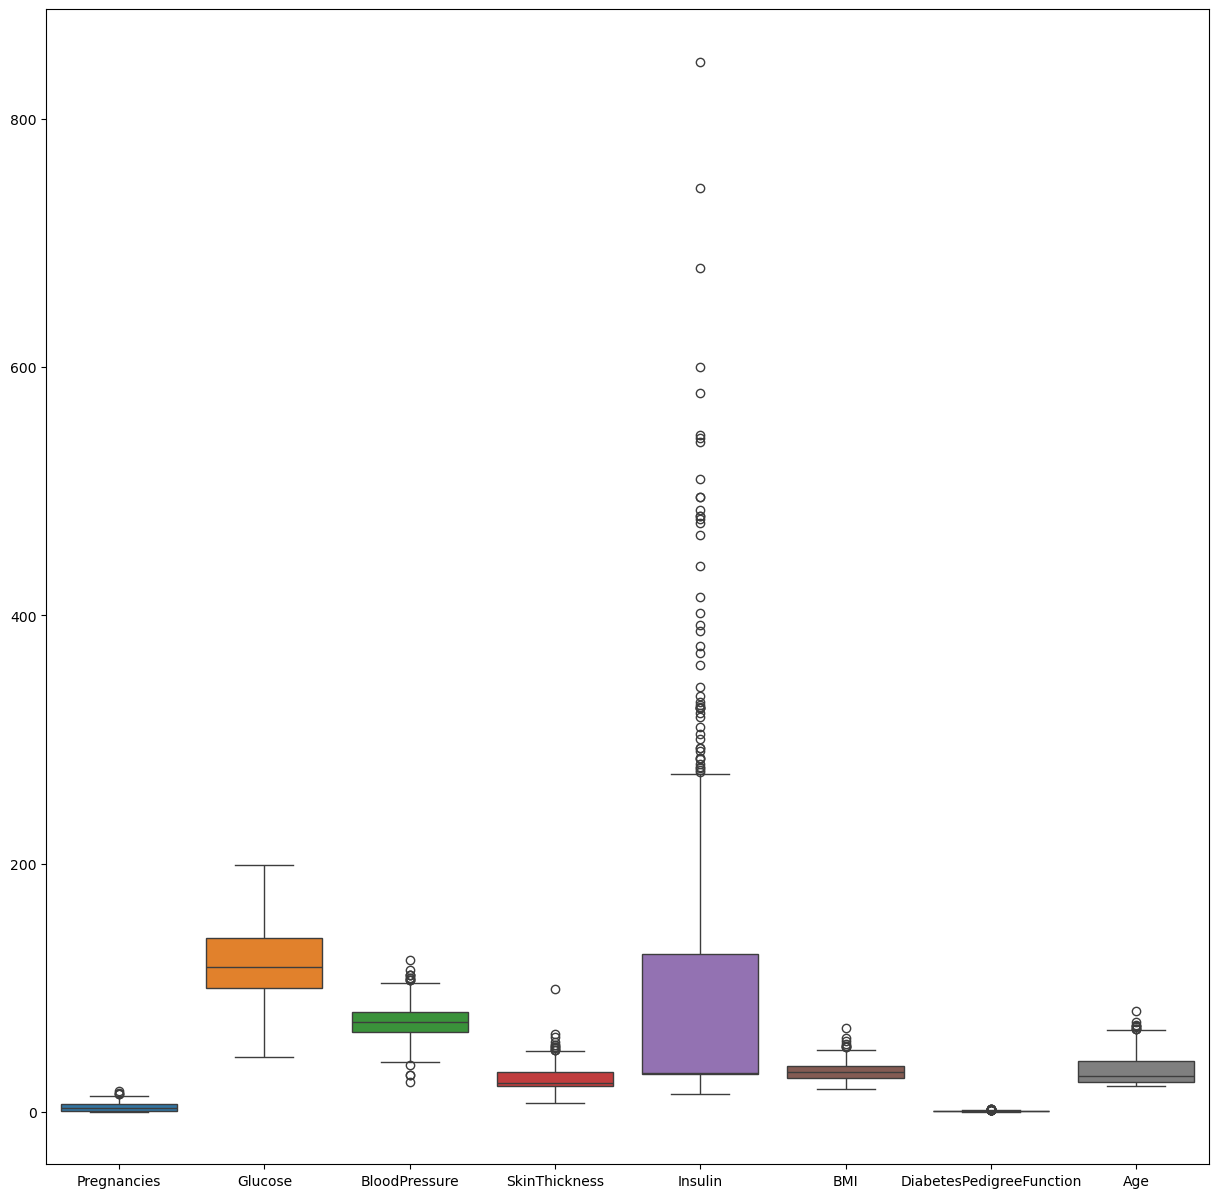

In [269]:
# Detecting outliers by boxplot

fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = X , ax = ax)
plt.savefig("BoxPlot.jpg")

In [270]:
# Function  for removing outliers by boxplot

def remove_outliers_IQR(df):
    df_cleaned = df.copy()
    for col in df_cleaned :
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - (1.5 * IQR)
        upper_fence = Q3 + (1.5 * IQR)
        ## Removing
        mask = (df_cleaned[col] >= lower_fence) & (df_cleaned[col] <= upper_fence)
        df_cleaned = df_cleaned[mask]

    return df_cleaned

In [271]:
## Cleaning the dataset
df_cleaned = remove_outliers_IQR(df)
X_cleaned = df_cleaned.drop(columns = "Outcome", axis = 1)
Y_cleaned = df_cleaned["Outcome"]

In [272]:
# Shape of X and Y after outlier detection
print("Shape of X after outlier detection is", X_cleaned.shape)
print("Shape of Y after outlier detection is", Y_cleaned.shape)

Shape of X after outlier detection is (640, 8)
Shape of Y after outlier detection is (640,)


128 rows are removed because there are outliers.

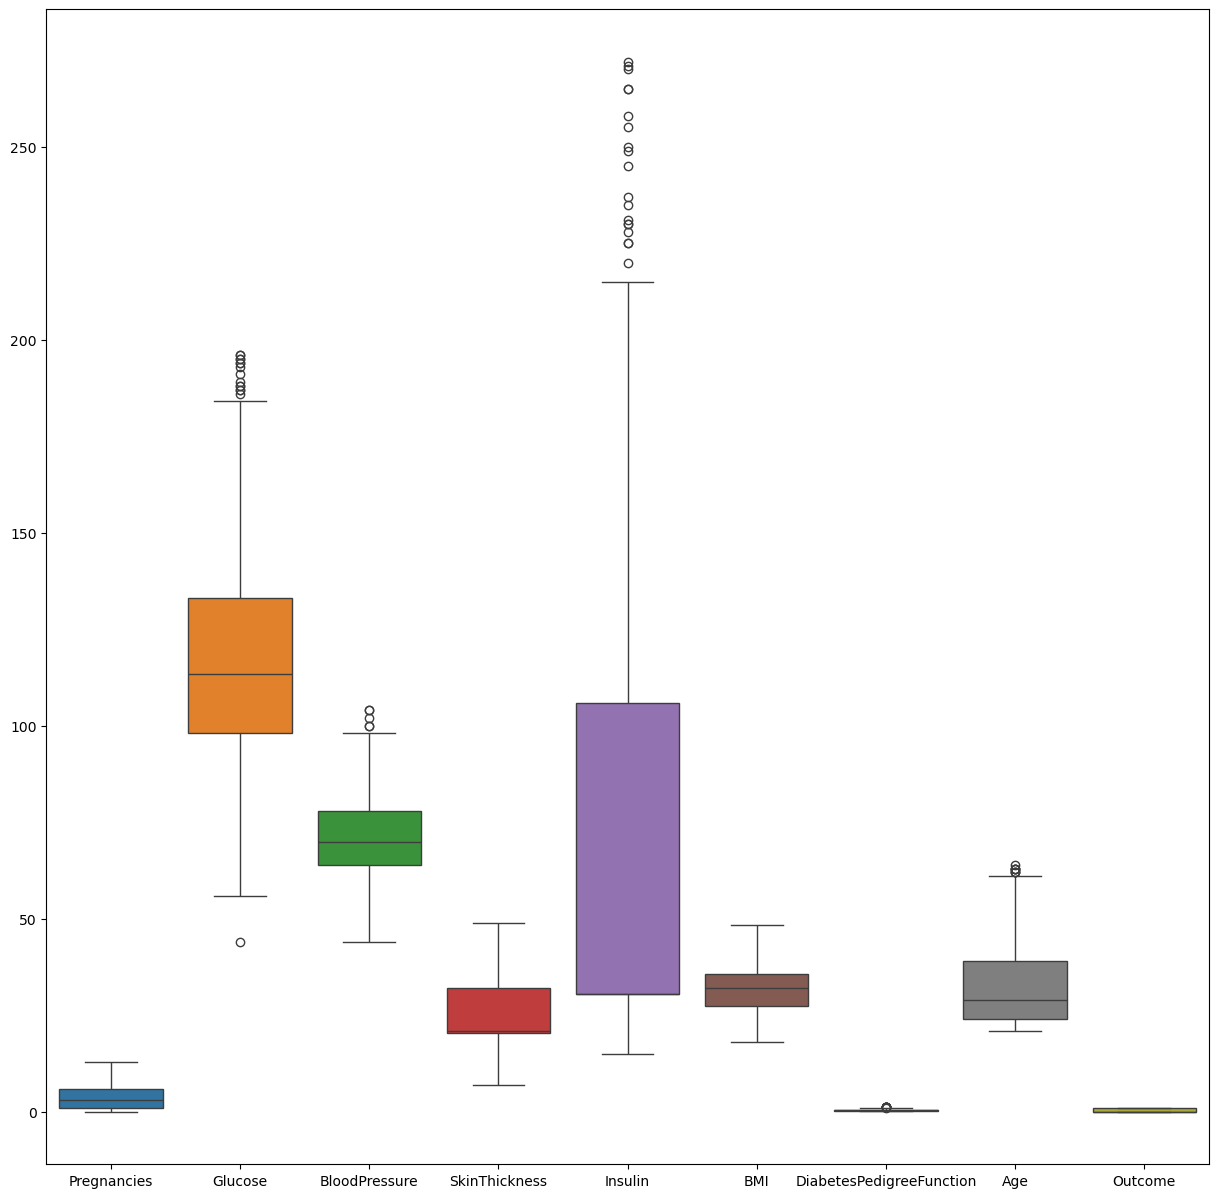

In [274]:
# Box Plot after outliers
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = df_cleaned , ax = ax)
plt.savefig("BoxPlot_1.jpg")

##### Normalization

In [276]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

In [277]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.describe()

,0,1,2,3,4,5,6,7
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,3.330669e-17,-2.053913e-16,2.733924e-16,-4.107825e-16,1.110223e-16,1.582068e-16,-8.187895e-17,-2.803313e-16
std,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00
min,-1.161790e+00,-2.623954e+00,-2.565302e+00,-2.199156e+00,-9.666690e-01,-2.169999e+00,-1.409044e+00,-1.065878e+00
25%,-8.522370e-01,-6.998517e-01,-7.069641e-01,-6.004785e-01,-7.100220e-01,-7.117878e-01,-7.543536e-01,-7.797761e-01
50%,-2.331318e-01,-1.475631e-01,-1.494627e-01,-5.457335e-01,-7.100220e-01,3.274762e-02,-3.086725e-01,-3.029400e-01
75%,6.955260e-01,5.472516e-01,5.938724e-01,7.533839e-01,5.400969e-01,6.342536e-01,6.574820e-01,6.507323e-01
max,2.862394e+00,2.792038e+00,3.009712e+00,2.761111e+00,3.288703e+00,2.653316e+00,3.033423e+00,3.034913e+00


In [278]:
Y_cleaned.value_counts()

Outcome
0    439
1    201
Name: count, dtype: int64

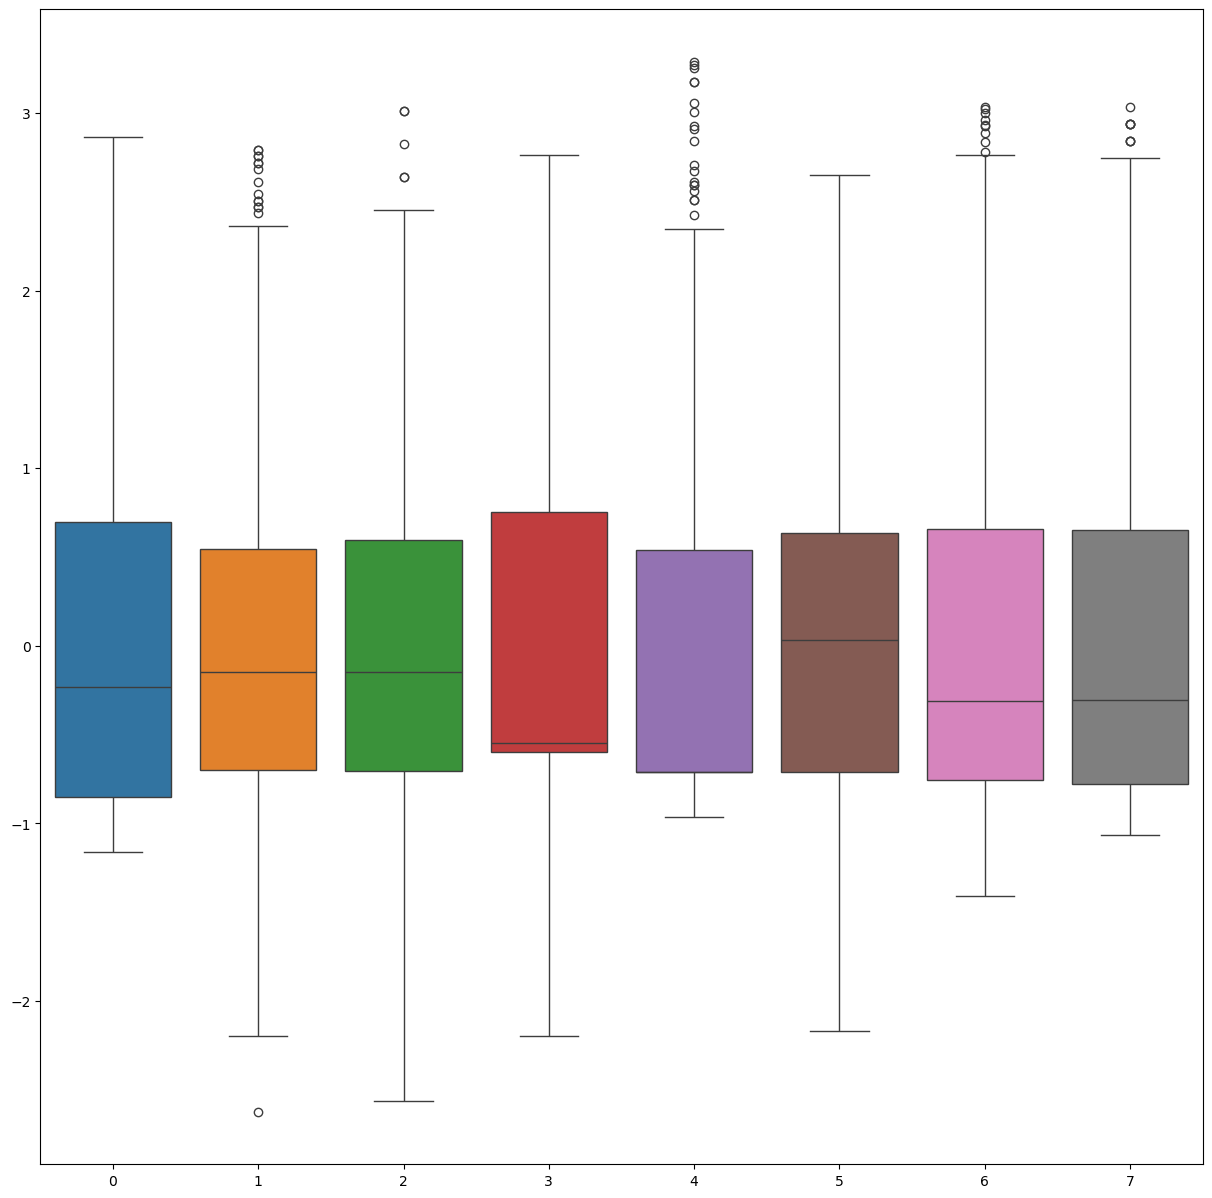

In [279]:
## Box plot after normalizing
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = X_scaled , ax = ax)
plt.savefig("BoxPlot_norm.jpg")

In [281]:
X_scaled.shape


(640, 8)

#### Model Training : Splitting data and Handling of Imbalanced Data

##### Model Training

**Solitting of data into training and testing**

[sklearn_test](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_cleaned, test_size=0.33, random_state=42)

In [299]:
X_train.shape

(428, 8)

In [301]:
X_test.shape

(212, 8)

In [305]:
y_train.value_counts()

Outcome
0    293
1    135
Name: count, dtype: int64

Number of "0"(293) is almost doubled then number of "1"(135), it is not balance data. -> Data Imbalancing

**Data Imbalancing**
Different types of techinques to reduce data imbalancing :-
- **Oversampling** :- Minority class and increase that number to the majority class.
- **Undersampling** :- Majority class and decrease that number to the minority class.
- **SMOTE** :- Synthetic data and increase the number of samples to the majority class.
- [Imblearn documentation](https://imbalanced-learn.org/stable/)

**SMOTE Technique**

In [312]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, y_train)

# Check resampled class distribution
print("\nResampled class distribution : ")
print(pd.Series(Y_train_resampled).value_counts())


Resampled class distribution : 
Outcome
0    293
1    293
Name: count, dtype: int64


Both outcomes are same :- Data imbalanced

#### Model Training: Implementation of Logistic Regression

[Sklearn Logistic resgression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [319]:
from sklearn.linear_model import LogisticRegression

## Classification 
classification = LogisticRegression()
## Fitting dataset
classification.fit(X_train_resampled, Y_train_resampled)

LogisticRegression()

#### Model Prediction and Evaluation

**Model Prediction**

In [325]:
Y_predictions = classification.predict(X_test)
print(Y_predictions)

[0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1
 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0]


**Model Evaluation**

[Sklearn accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [333]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_predictions)

0.7594339622641509

Prediction is 75.943% correct

**Classification report**

[sklearn classification report](https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.classification_report.html)

In [341]:
from sklearn.metrics import classification_report
target_names = ["Non-Diabetics", "Diabetics"]
print(classification_report(y_test, Y_predictions, target_names = target_names))

               precision    recall  f1-score   support

Non-Diabetics       0.87      0.76      0.81       146
    Diabetics       0.59      0.76      0.66        66

     accuracy                           0.76       212
    macro avg       0.73      0.76      0.74       212
 weighted avg       0.79      0.76      0.77       212



**Heathcare** :- **Recall** is very important metric. It must be closed to 1.

#### Saving the model

In [345]:
import pickle
pickle.dump(classification, open("Classification_model.pkl", "wb"))

Model is saved the file

In [352]:
## Using saved file
classification_model = pickle.load(open("Classification_model.pkl", "rb"))
classification_model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)